In [1]:
import pickle

def pickle_load(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

# mapper = 'jordan_wigner'
mapper = 'bravyi_kitaev'
# mapper = 'parity'

PH_data_list = pickle_load(f'runs/{mapper}/PH_data.pickle')
Tetris_data_list = pickle_load(f'runs/{mapper}/Tetris_data.pickle')
Max_cancel_data_list = pickle_load(f'runs/{mapper}/Tetris_max_cancel_data.pickle')

# swap_coefficients = [1000, 4, 3, 2, 1, 0.75, 0.5, 0.25, 0]
swap_coefficients = []
Tetris_swap_coefficient_data_list = {}
for swap_coeff in swap_coefficients:
    Tetris_swap_coefficient_data_list[swap_coeff] = pickle_load(f'runs/{mapper}/Tetris_swap_coefficient_{swap_coeff}_data.pickle')

In [2]:
categories = []
ph_cx_cancel_ratio = []
tetris_cx_cancel_ratio = []
max_cancel_cx_cancel_ratio = []
tetris_various_cx_cancel_ratio = [[] for swap_coeff in swap_coefficients]

ph_swaps = []
tetris_swaps = []
max_cancel_swaps = []
tetris_various_swaps = [[] for swap_coeff in swap_coefficients]

ph_cnots = []
tetris_cnots = []
max_cancel_cnots = []
tetris_various_cnots = [[] for swap_coeff in swap_coefficients]

for i, (ph_data, tetris_data, max_cancel_data) in enumerate(zip(PH_data_list, Tetris_data_list, Max_cancel_data_list)):
    print(ph_data)
    print(tetris_data)
    print(max_cancel_data)
    mole, ph = ph_data
    mole, tetris = tetris_data
    mole, max_cancel = max_cancel_data
    categories.append(mole)
    
    original_cx_count = tetris['original CNOT count']
    ph_cx_cancel_ratio.append(1.0 - 1.0 * (ph['CNOT'] - ph['PH_swap_count'] * 3) / original_cx_count)
    # tetris_cx_cancel_ratio.append(1.0 - 1.0 * tetris['tetris_cx_count'] / original_cx_count)
    # tetris_cx_cancel_ratio.append(1.0 - 1.0 * (tetris['CNOT'] - tetris['tetris_swap_count'] * 3) / original_cx_count)
    max_cancel_cx_cancel_ratio.append(1.0 - 1.0 * (max_cancel['CNOT'] - max_cancel['tetris_swap_count'] * 3) / original_cx_count)
    
    ph_swaps.append(ph['PH_swap_count'])
    # tetris_swaps.append(tetris['tetris_swap_count'])
    max_cancel_swaps.append(max_cancel['tetris_swap_count'])
    
    ph_cnots.append(ph['CNOT'])
    # tetris_cnots.append(tetris['CNOT'])
    max_cancel_cnots.append(max_cancel['CNOT'])
    
    for j, swap_coeff in enumerate(swap_coefficients):
        mole, data = Tetris_swap_coefficient_data_list[swap_coeff][i]
        tetris_various_cx_cancel_ratio[j].append(1.0 - 1.0 * (data['CNOT'] - data['tetris_swap_count'] * 3) / original_cx_count)
        tetris_various_swaps[j].append(data['tetris_swap_count'])
        tetris_various_cnots[j].append(data['CNOT'])

('LiH', {'n_qubits': 12, 'PH_swap_count': 1206, 'PH_cx_count': 8680, 'CNOT': 10074, 'Single': 4688, 'Total': 14762, 'Depth': 10790})
('LiH', {'n_qubits': 12, 'IR_total': 18198, 'IR_remain': 12310, 'IR_cancel_ratio': 0.32355203868556986, 'tetris_swap_count': 1446, 'tetris_cx_count': 6916, 'tetris_bridge_count': 0, 'pauli string count': 640, 'original CNOT count': 8680, 'original single gate count without rz': 7440, 'original total gate count': 16760, 'CNOT': 9671, 'Single': 4945, 'Total': 14616, 'Depth': 10472})
('LiH', {'n_qubits': 12, 'IR_total': 13404, 'IR_remain': 10636, 'IR_cancel_ratio': 0.20650552074007758, 'tetris_swap_count': 3924, 'tetris_cx_count': 5658, 'tetris_bridge_count': 0, 'pauli string count': 640, 'CNOT': 15216, 'Single': 5616, 'Total': 20832, 'Depth': 14628})
('BeH2', {'n_qubits': 14, 'PH_swap_count': 2649, 'PH_cx_count': 18796, 'CNOT': 22057, 'Single': 10843, 'Total': 32900, 'Depth': 23140})
('BeH2', {'n_qubits': 14, 'IR_total': 39556, 'IR_remain': 26362, 'IR_cance

In [3]:
import matplotlib.pyplot as plt
import numpy as np

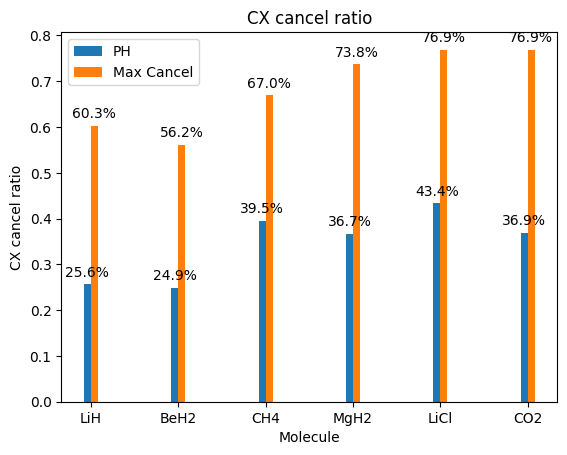

In [4]:
x = np.arange(len(categories))

# Define the width of each bar
bar_width = 0.08
length = 2 + len(swap_coefficients)
positions = [(i + 0.5 - length/2) * bar_width for i in range(length)]

# Create the grouped bar chart
plt.bar(x + positions[0], ph_cx_cancel_ratio, bar_width, label='PH')
for i, position in enumerate(positions[1:-1]):
    plt.bar(x + position, tetris_various_cx_cancel_ratio[i], bar_width, label=f'Tetris_{swap_coefficients[i]}')
plt.bar(x + positions[-1], max_cancel_cx_cancel_ratio, bar_width, label='Max Cancel')
# Add labels to the bars
for i in range(len(categories)):
    for position, datalist in zip(positions, [ph_cx_cancel_ratio] + tetris_various_cx_cancel_ratio + [max_cancel_cx_cancel_ratio]):
        plt.text(x[i] + position, datalist[i] + 0.01, str(round(datalist[i] * 100, 1)) + '%', ha='center', va='bottom')
    # plt.text(x[i] + positions[0], ph_cx_cancel_ratio[i] + 0.01, str(round(ph_cx_cancel_ratio[i] * 100, 1)) + '%', ha='center', va='bottom')
    # plt.text(x[i], tetris_cx_cancel_ratio[i] + 0.01, str(round(tetris_cx_cancel_ratio[i] * 100, 1)) + '%', ha='center', va='bottom')
    # plt.text(x[i] + positions[-1], max_cancel_cx_cancel_ratio[i] + 0.01, str(round(max_cancel_cx_cancel_ratio[i] * 100, 1)) + '%', ha='center', va='bottom')

# Add category labels to the x-axis
plt.xticks(x, categories)

# Add labels and a legend
plt.xlabel('Molecule')
plt.ylabel('CX cancel ratio')
plt.title('CX cancel ratio')
plt.legend()

# Show the plot
plt.show()


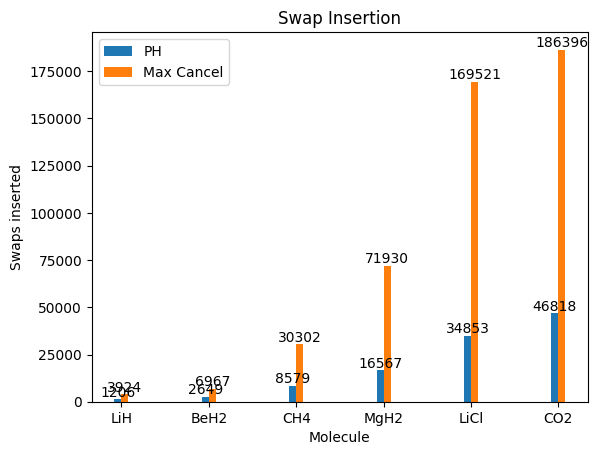

In [5]:
x = np.arange(len(categories))

# Define the width of each bar
bar_width = 0.08
length = 2 + len(swap_coefficients)
positions = [(i + 0.5 - length/2) * bar_width for i in range(length)]

# Create the grouped bar chart
plt.bar(x + positions[0], ph_swaps, bar_width, label='PH')
for i, position in enumerate(positions[1:-1]):
    plt.bar(x + position, tetris_various_swaps[i], bar_width, label=f'Tetris_{swap_coefficients[i]}')
plt.bar(x + positions[-1], max_cancel_swaps, bar_width, label='Max Cancel')
# Add labels to the bars
for i in range(len(categories)):
    for position, datalist in zip(positions, [ph_swaps] + tetris_various_swaps + [max_cancel_swaps]):
        plt.text(x[i] + position, datalist[i] + 0.01, str(datalist[i]), ha='center', va='bottom')
    # plt.text(x[i] + positions[0], ph_cx_cancel_ratio[i] + 0.01, str(round(ph_cx_cancel_ratio[i] * 100, 1)) + '%', ha='center', va='bottom')
    # plt.text(x[i], tetris_cx_cancel_ratio[i] + 0.01, str(round(tetris_cx_cancel_ratio[i] * 100, 1)) + '%', ha='center', va='bottom')
    # plt.text(x[i] + positions[-1], max_cancel_cx_cancel_ratio[i] + 0.01, str(round(max_cancel_cx_cancel_ratio[i] * 100, 1)) + '%', ha='center', va='bottom')


# Add category labels to the x-axis
plt.xticks(x, categories)

# Add labels and a legend
plt.xlabel('Molecule')
plt.ylabel('Swaps inserted')
plt.title('Swap Insertion')
plt.legend()

# Show the plot
plt.show()


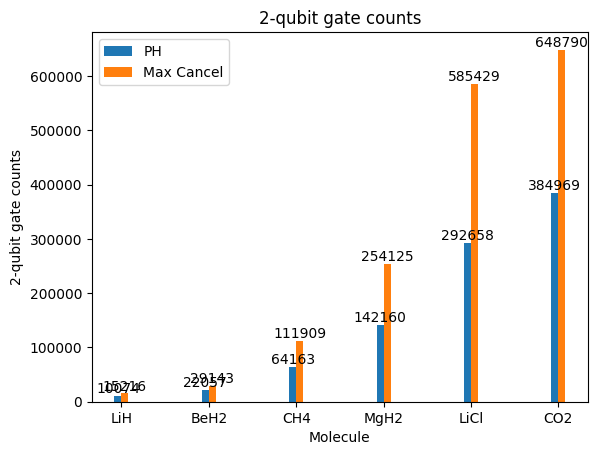

In [6]:
x = np.arange(len(categories))

# Define the width of each bar
bar_width = 0.08
length = 2 + len(swap_coefficients)
positions = [(i + 0.5 - length/2) * bar_width for i in range(length)]

# Create the grouped bar chart
plt.bar(x + positions[0], ph_cnots, bar_width, label='PH')
for i, position in enumerate(positions[1:-1]):
    plt.bar(x + position, tetris_various_cnots[i], bar_width, label=f'Tetris_{swap_coefficients[i]}')
plt.bar(x + positions[-1], max_cancel_cnots, bar_width, label='Max Cancel')
# Add labels to the bars
for i in range(len(categories)):
    for position, datalist in zip(positions, [ph_cnots] + tetris_various_cnots + [max_cancel_cnots]):
        plt.text(x[i] + position, datalist[i] + 0.01, str(datalist[i]), ha='center', va='bottom')

# Add category labels to the x-axis
plt.xticks(x, categories)

# Add labels and a legend
plt.xlabel('Molecule')
plt.ylabel('2-qubit gate counts')
plt.title('2-qubit gate counts')
plt.legend()

# Show the plot
plt.show()
